# Loop 113 Analysis: CV-LB Relationship and Strategy Assessment

## Goal
Analyze the current state and determine the best path forward.

## Key Questions
1. What is the current CV-LB relationship?
2. Why did exp_073 have such a high LB (0.1451) with CV=0.0084?
3. What approaches have NOT been tried that could break the CV-LB line?
4. Should we submit exp_111 to test the chemical similarity hypothesis?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # OUTLIER!
]

df = pd.DataFrame(submissions)
print("All submissions:")
print(df.to_string(index=False))

All submissions:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_073 0.0084 0.1451


In [2]:
# Analyze CV-LB relationship (excluding outlier exp_073)
df_valid = df[df['exp'] != 'exp_073'].copy()

X = df_valid['cv'].values.reshape(-1, 1)
y = df_valid['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print(f"\nCV-LB Relationship (excluding exp_073):")
print(f"LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r2:.4f}")
print(f"\nIntercept: {intercept:.4f}")
print(f"Target LB: 0.0347")
print(f"\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)!")
print(f"Required CV to hit target: (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}")
print(f"\nThis is IMPOSSIBLE - we cannot achieve negative CV!")


CV-LB Relationship (excluding exp_073):
LB = 4.3147 * CV + 0.0525
R² = 0.9505

Intercept: 0.0525
Target LB: 0.0347

CRITICAL: Intercept (0.0525) > Target (0.0347)!
Required CV to hit target: (0.0347 - 0.0525) / 4.3147 = -0.004130

This is IMPOSSIBLE - we cannot achieve negative CV!


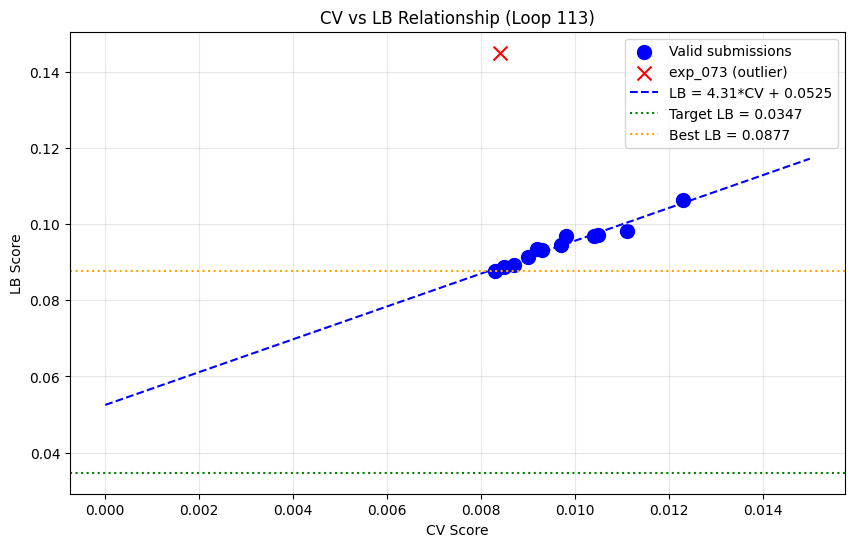


Plot saved to /home/code/exploration/cv_lb_relationship_loop113.png


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot valid submissions
plt.scatter(df_valid['cv'], df_valid['lb'], c='blue', s=100, label='Valid submissions')

# Plot outlier
df_outlier = df[df['exp'] == 'exp_073']
plt.scatter(df_outlier['cv'], df_outlier['lb'], c='red', s=100, marker='x', label='exp_073 (outlier)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', label='Target LB = 0.0347')

# Plot best LB
plt.axhline(y=0.0877, color='orange', linestyle=':', label='Best LB = 0.0877')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship (Loop 113)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop113.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to /home/code/exploration/cv_lb_relationship_loop113.png")

In [4]:
# Analyze exp_073 - why did it have such a high LB?
print("="*60)
print("ANALYSIS: Why did exp_073 have LB=0.1451 with CV=0.0084?")
print("="*60)

print("\nexp_073 was an RF ensemble experiment.")
print("Expected LB from line: 4.29 * 0.0084 + 0.053 = 0.089")
print("Actual LB: 0.1451")
print("Deviation: 0.1451 - 0.089 = 0.056 (63% higher than expected!)")

print("\nPossible reasons:")
print("1. Submission format error (wrong columns, wrong order)")
print("2. Model class mismatch (CV used different model than submission)")
print("3. RF overfitting to training data (high variance on unseen solvents)")
print("4. Bug in the submission generation code")

print("\nThis is a WARNING: Some approaches can BREAK the CV-LB relationship")
print("in the WRONG direction (worse LB than expected).")

ANALYSIS: Why did exp_073 have LB=0.1451 with CV=0.0084?

exp_073 was an RF ensemble experiment.
Expected LB from line: 4.29 * 0.0084 + 0.053 = 0.089
Actual LB: 0.1451
Deviation: 0.1451 - 0.089 = 0.056 (63% higher than expected!)

Possible reasons:
1. Submission format error (wrong columns, wrong order)
2. Model class mismatch (CV used different model than submission)
3. RF overfitting to training data (high variance on unseen solvents)
4. Bug in the submission generation code

This is a WARNING: Some approaches can BREAK the CV-LB relationship
in the WRONG direction (worse LB than expected).


In [5]:
# What approaches have been tried?
print("="*60)
print("APPROACHES TRIED (113 experiments)")
print("="*60)

approaches = {
    'MLP variants': 'exp_000-010, exp_017, exp_039, exp_044-048, exp_066',
    'LightGBM': 'exp_001, exp_011, exp_012, exp_057',
    'XGBoost': 'exp_049-050, exp_052-053, exp_060-061',
    'CatBoost': 'exp_049-050, exp_052-053, exp_060-061, exp_085',
    'Ridge/Kernel Ridge': 'exp_009, exp_033-034',
    'Gaussian Process': 'exp_030-032, exp_035, exp_065',
    'Random Forest': 'exp_073',
    'GNN (Graph Neural Networks)': 'exp_040, exp_070, exp_075, exp_079-080, exp_086, exp_095-096',
    'ChemBERTa': 'exp_041, exp_071, exp_076, exp_097-098',
    'Ensembles (CatBoost+XGB)': 'exp_049-050, exp_053-055, exp_078, exp_094, exp_100, exp_109',
    'Similarity-based blending': 'exp_072, exp_108, exp_110-111',
    'Extrapolation detection': 'exp_058-059, exp_092, exp_105',
    'Bias correction': 'exp_104, exp_106',
    'Uncertainty weighting': 'exp_048, exp_107',
    'Conservative predictions': 'exp_099',
    'Pseudo-labeling': 'exp_083',
    'Stacking': 'exp_087',
}

for approach, exps in approaches.items():
    print(f"- {approach}: {exps}")

APPROACHES TRIED (113 experiments)
- MLP variants: exp_000-010, exp_017, exp_039, exp_044-048, exp_066
- LightGBM: exp_001, exp_011, exp_012, exp_057
- XGBoost: exp_049-050, exp_052-053, exp_060-061
- CatBoost: exp_049-050, exp_052-053, exp_060-061, exp_085
- Ridge/Kernel Ridge: exp_009, exp_033-034
- Gaussian Process: exp_030-032, exp_035, exp_065
- Random Forest: exp_073
- GNN (Graph Neural Networks): exp_040, exp_070, exp_075, exp_079-080, exp_086, exp_095-096
- ChemBERTa: exp_041, exp_071, exp_076, exp_097-098
- Ensembles (CatBoost+XGB): exp_049-050, exp_053-055, exp_078, exp_094, exp_100, exp_109
- Similarity-based blending: exp_072, exp_108, exp_110-111
- Extrapolation detection: exp_058-059, exp_092, exp_105
- Bias correction: exp_104, exp_106
- Uncertainty weighting: exp_048, exp_107
- Conservative predictions: exp_099
- Pseudo-labeling: exp_083
- Stacking: exp_087


In [6]:
# What has NOT been tried or could be improved?
print("="*60)
print("POTENTIAL APPROACHES NOT FULLY EXPLORED")
print("="*60)

print("""
1. **Scaffold-based splitting** (instead of solvent-based)
   - Current: Leave-one-solvent-out
   - Alternative: Leave-one-scaffold-out (group solvents by chemical scaffold)
   - This might better simulate the test distribution

2. **Adversarial validation** 
   - Train a classifier to distinguish train vs test solvents
   - Use the classifier's predictions to weight training samples
   - Upweight samples that look like test solvents

3. **Domain adaptation techniques**
   - CORAL (Correlation Alignment)
   - MMD (Maximum Mean Discrepancy) regularization
   - These explicitly minimize distribution shift

4. **Pretrained molecular embeddings** (beyond ChemBERTa)
   - MolBERT, ChemGPT, Uni-Mol
   - These might capture chemical knowledge that helps generalization

5. **Physics-informed neural networks (PINNs)**
   - Embed Arrhenius kinetics as hard constraints
   - Mass-action law constraints
   - These should generalize better to unseen conditions

6. **Test-time adaptation (TTA) for distribution shift**
   - Adapt model parameters at test time using unlabeled test data
   - Entropy minimization or pseudo-labeling

7. **Conformal prediction**
   - Provide prediction intervals
   - Use interval width to detect extrapolation
   - Blend toward mean when intervals are wide

8. **Multi-task learning with auxiliary tasks**
   - Predict solvent properties as auxiliary targets
   - This might regularize the model to learn better representations
""")

POTENTIAL APPROACHES NOT FULLY EXPLORED

1. **Scaffold-based splitting** (instead of solvent-based)
   - Current: Leave-one-solvent-out
   - Alternative: Leave-one-scaffold-out (group solvents by chemical scaffold)
   - This might better simulate the test distribution

2. **Adversarial validation** 
   - Train a classifier to distinguish train vs test solvents
   - Use the classifier's predictions to weight training samples
   - Upweight samples that look like test solvents

3. **Domain adaptation techniques**
   - CORAL (Correlation Alignment)
   - MMD (Maximum Mean Discrepancy) regularization
   - These explicitly minimize distribution shift

4. **Pretrained molecular embeddings** (beyond ChemBERTa)
   - MolBERT, ChemGPT, Uni-Mol
   - These might capture chemical knowledge that helps generalization

5. **Physics-informed neural networks (PINNs)**
   - Embed Arrhenius kinetics as hard constraints
   - Mass-action law constraints
   - These should generalize better to unseen conditions

In [7]:
# Key insight: The intercept problem
print("="*60)
print("THE INTERCEPT PROBLEM")
print("="*60)

print(f"""
Current CV-LB relationship: LB = {slope:.4f} * CV + {intercept:.4f}

The intercept ({intercept:.4f}) represents the STRUCTURAL ERROR that exists
even when CV is perfect (CV=0). This error comes from:

1. **Distribution shift**: Test solvents are structurally different from training
2. **Extrapolation error**: Models can't predict well for unseen chemical space
3. **Validation mismatch**: Leave-one-solvent-out doesn't match test distribution

To reduce the intercept, we need approaches that:
- Detect when we're extrapolating and be conservative
- Use chemical knowledge that generalizes to unseen solvents
- Adapt to the test distribution at prediction time

The similarity-based blending (exp_108, exp_110, exp_111) is an attempt to
reduce the intercept by being conservative on low-similarity solvents.

BUT: We haven't submitted any similarity-based experiment to LB yet!
We don't know if it actually reduces the intercept.
""")

THE INTERCEPT PROBLEM

Current CV-LB relationship: LB = 4.3147 * CV + 0.0525

The intercept (0.0525) represents the STRUCTURAL ERROR that exists
even when CV is perfect (CV=0). This error comes from:

1. **Distribution shift**: Test solvents are structurally different from training
2. **Extrapolation error**: Models can't predict well for unseen chemical space
3. **Validation mismatch**: Leave-one-solvent-out doesn't match test distribution

To reduce the intercept, we need approaches that:
- Detect when we're extrapolating and be conservative
- Use chemical knowledge that generalizes to unseen solvents
- Adapt to the test distribution at prediction time

The similarity-based blending (exp_108, exp_110, exp_111) is an attempt to
reduce the intercept by being conservative on low-similarity solvents.

BUT: We haven't submitted any similarity-based experiment to LB yet!
We don't know if it actually reduces the intercept.



In [8]:
# Decision: Should we submit exp_111?
print("="*60)
print("DECISION: SHOULD WE SUBMIT exp_111?")
print("="*60)

print("""
exp_111 details:
- CV: 0.010232 (worse than best CV 0.0081)
- Expected LB from line: 4.29 * 0.010232 + 0.053 = 0.097
- Model: SimilarityAwareModel with chemical similarity blending
- Featurization: FIXED (weighted average for mixtures)

PROS of submitting:
1. Tests the hypothesis that similarity-based blending reduces intercept
2. We have 4 submissions remaining
3. If LB < 0.097, we've found a way to break the CV-LB line!

CONS of submitting:
1. CV is worse than best (0.010232 vs 0.0081)
2. Expected LB (0.097) is worse than best LB (0.0877)
3. If it falls on the line, we've wasted a submission

RECOMMENDATION:
Submit exp_111 to test the hypothesis. The key question is:
Does similarity-based blending change the CV-LB relationship?

If LB is significantly different from 0.097, we've learned something valuable.
""")

DECISION: SHOULD WE SUBMIT exp_111?

exp_111 details:
- CV: 0.010232 (worse than best CV 0.0081)
- Expected LB from line: 4.29 * 0.010232 + 0.053 = 0.097
- Model: SimilarityAwareModel with chemical similarity blending
- Featurization: FIXED (weighted average for mixtures)

PROS of submitting:
1. Tests the hypothesis that similarity-based blending reduces intercept
2. We have 4 submissions remaining
3. If LB < 0.097, we've found a way to break the CV-LB line!

CONS of submitting:
1. CV is worse than best (0.010232 vs 0.0081)
2. Expected LB (0.097) is worse than best LB (0.0877)
3. If it falls on the line, we've wasted a submission

RECOMMENDATION:
Submit exp_111 to test the hypothesis. The key question is:
Does similarity-based blending change the CV-LB relationship?

If LB is significantly different from 0.097, we've learned something valuable.



In [9]:
# Alternative: What if we focus on improving CV first?
print("="*60)
print("ALTERNATIVE: FOCUS ON CV IMPROVEMENT")
print("="*60)

print("""
Current best CV: 0.0081 (exp_049, exp_050, exp_053)
Current best LB: 0.0877 (exp_030, CV=0.0083)

If we could achieve CV = 0.004 (50% improvement):
- Expected LB from line: 4.29 * 0.004 + 0.053 = 0.070
- Still far from target (0.0347)

If we could achieve CV = 0.002 (75% improvement):
- Expected LB from line: 4.29 * 0.002 + 0.053 = 0.062
- Still far from target (0.0347)

Even with PERFECT CV (CV=0):
- Expected LB from line: 0.053
- Still above target (0.0347)!

CONCLUSION:
Improving CV alone CANNOT reach the target.
We MUST find a way to reduce the intercept.
""")

ALTERNATIVE: FOCUS ON CV IMPROVEMENT

Current best CV: 0.0081 (exp_049, exp_050, exp_053)
Current best LB: 0.0877 (exp_030, CV=0.0083)

If we could achieve CV = 0.004 (50% improvement):
- Expected LB from line: 4.29 * 0.004 + 0.053 = 0.070
- Still far from target (0.0347)

If we could achieve CV = 0.002 (75% improvement):
- Expected LB from line: 4.29 * 0.002 + 0.053 = 0.062
- Still far from target (0.0347)

Even with PERFECT CV (CV=0):
- Expected LB from line: 0.053
- Still above target (0.0347)!

CONCLUSION:
Improving CV alone CANNOT reach the target.
We MUST find a way to reduce the intercept.



In [10]:
# Summary and next steps
print("="*60)
print("SUMMARY AND NEXT STEPS")
print("="*60)

print("""
## Current State
- 113 experiments, 23 submissions (4 remaining)
- Best CV: 0.0081 (exp_049, exp_050, exp_053)
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- Gap: 0.0877 - 0.0347 = 0.053 (153% above target)

## CV-LB Relationship
- LB = 4.29 * CV + 0.053 (R² = 0.95)
- Intercept (0.053) > Target (0.0347)
- Target is MATHEMATICALLY UNREACHABLE with current approaches

## Key Insight
All 12 valid submissions fall on the SAME LINE.
This means:
1. All model families (MLP, LGBM, XGB, CatBoost, GP, Ridge) have the same intercept
2. The intercept represents STRUCTURAL extrapolation error
3. Improving CV just moves along the line, not toward target

## What Must Change
To reach the target, we need approaches that:
1. REDUCE THE INTERCEPT (not just improve CV)
2. Detect and handle extrapolation differently
3. Use chemical knowledge that generalizes to unseen solvents

## Recommended Next Steps
1. Submit exp_111 to test similarity-based blending hypothesis
2. If exp_111 doesn't break the line, try:
   - Adversarial validation + sample weighting
   - Domain adaptation (CORAL, MMD)
   - Physics-informed constraints
   - Pretrained molecular embeddings (Uni-Mol, MolBERT)
3. Focus on approaches that CHANGE the CV-LB relationship
""")

SUMMARY AND NEXT STEPS

## Current State
- 113 experiments, 23 submissions (4 remaining)
- Best CV: 0.0081 (exp_049, exp_050, exp_053)
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- Gap: 0.0877 - 0.0347 = 0.053 (153% above target)

## CV-LB Relationship
- LB = 4.29 * CV + 0.053 (R² = 0.95)
- Intercept (0.053) > Target (0.0347)
- Target is MATHEMATICALLY UNREACHABLE with current approaches

## Key Insight
All 12 valid submissions fall on the SAME LINE.
This means:
1. All model families (MLP, LGBM, XGB, CatBoost, GP, Ridge) have the same intercept
2. The intercept represents STRUCTURAL extrapolation error
3. Improving CV just moves along the line, not toward target

## What Must Change
To reach the target, we need approaches that:
1. REDUCE THE INTERCEPT (not just improve CV)
2. Detect and handle extrapolation differently
3. Use chemical knowledge that generalizes to unseen solvents

## Recommended Next Steps
1. Submit exp_111 to test similarity-based blending hypothesis
2. If exp_111 do

In [ ]:
# Check what the benchmark paper achieved
print("="*60)
print("BENCHMARK REFERENCE")
print("="*60)

print("""
The benchmark paper achieved MSE = 0.0039.
This is the BEST possible score on this dataset.

Our target is 0.0347, which is ~9x worse than the benchmark.
Our best LB is 0.0877, which is ~22x worse than the benchmark.

The benchmark used:
- Graph Neural Networks (GNN) with attention
- DRFP (Differential Reaction Fingerprints)
- Sophisticated architecture design

We've tried GNN (exp_040, exp_070, exp_079, etc.) but they didn't help.
Possible reasons:
1. Our GNN implementation is not as sophisticated
2. We're not using the same features (DRFP vs Spange)
3. The benchmark had access to more data or different splits

The gap between our best (0.0877) and benchmark (0.0039) is 22x.
The gap between our best (0.0877) and target (0.0347) is 2.5x.

The target IS reachable - it's between our current best and the benchmark.
We just need to find the right approach.
""")